# Playing with Barycentric Interpolation

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
x = np.linspace(-1, 1, 5)
xx = np.linspace(-1, 1, 100)

def f(x):
    return np.sin(5/(1.6-x))

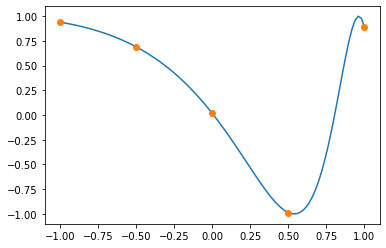

In [50]:
plt.plot(xx, f(xx))
plt.plot(x, f(x), "o")

In [80]:
dmat = x.reshape(-1, 1) - x
np.fill_diagonal(dmat, 1)
dmat[0, 2], x[0]-x[2]

(-1.0, -1.0)

In [128]:
w = 1/dmat.prod(axis=1)
w

array([ 0.66666667, -2.66666667,  4.        , -2.66666667,  0.66666667])

In [119]:
def bary_first_form(z, f):
    z = z[:, np.newaxis]
    ell = (z-x).prod(axis=-1)
    return ell * (w / (z - x) * f(x)).sum(axis=-1)

/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


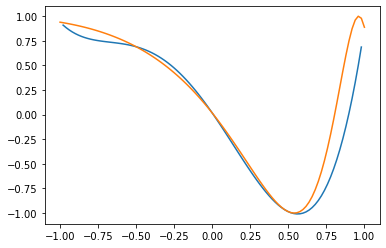

In [129]:
plt.plot(xx, bary_first_form(xx, f))
plt.plot(xx, f(xx))

In [134]:
def bary_second_form(z, f, weights=None):
    if weights is None:
        weights = w
    z = z[:, np.newaxis]
    num = (weights / (z - x) * f(x)).sum(axis=-1)
    denom = (weights / (z - x)).sum(axis=-1)
    return num/denom

/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


(-2, 2)

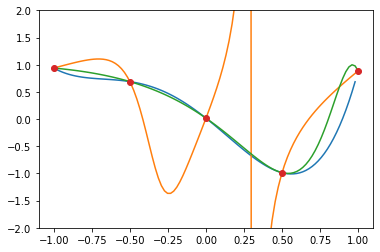

In [140]:
wr = w.copy()
wr[:] = np.random.randn(len(x))

plt.plot(xx, bary_second_form(xx, f))
plt.plot(xx, bary_second_form(xx, f, weights=wr))
plt.plot(xx, f(xx))
plt.plot(x, f(x), "o")
plt.ylim([-2, 2])